<a href="https://colab.research.google.com/github/Mariyselita/Ciberbullying/blob/main/CB_Tratamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
filepath = '/content/drive/My Drive/DATASET_TESIS_CIC/PRUEBAS_TLN/cb_data_tln_corregido.xlsx'

In [3]:
!pip install pandas openpyxl

In [4]:
import pandas as pd
import re

In [5]:
with open(filepath, 'r', encoding='utf-8') as file:
    df = pd.read_excel(filepath)

# Limpieza de texto

In [6]:
#Funciones de limpieza de texto
def clean_excel_text(text):
    if pd.isnull(text):  # Manejar valores nulos
        return ""
    # Remover menciones (@usuario)
    text = re.sub(r"@\w+", "", text)
    # Remover URLs
    text = re.sub(r"http\S+", "", text)
    # Eliminar caracteres especiales (solo mantener alfanuméricos y espacios)
    text = re.sub(r"[^\w\s]", "", text)
    # Quitar espacios extra
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Aplicar la limpieza a la columna 'text'
df["text_cleaned"] = df["text"].apply(clean_excel_text)

# Mostrar una vista previa de los datos limpios
print(df[["text", "text_cleaned"]].head())

# Guardar los datos limpios en un nuevo archivo Excel
output_file = "/content/drive/My Drive/DATASET_TESIS_CIC/PRUEBAS_TLN/CB_data_clean.xlsx"
df.to_excel(output_file, index=False)

print(f"Archivo limpio guardado en {output_file}")


                                                text  \
0  @feralama Qué bueno que no pusiste un hashtag ...   
1  Acabo de mamarme un latte frío como si de eso ...   
2  @clubhilosfutbol @OficialCAP @LosAromosCAP @ra...   
3  @laloespana @marisolpereda @DMargaraFran Un ví...   
4  El Jefe del Departamento de Secundarias Genera...   

                                        text_cleaned  
0  Qué bueno que no pusiste un hashtag porque no ...  
1  Acabo de mamarme un latte frío como si de eso ...  
2  Tendrás ahí a lamano el cortometraje gol de mo...  
3                               Un vídeo genialisimo  
4  El Jefe del Departamento de Secundarias Genera...  
Archivo limpio guardado en /content/drive/My Drive/DATASET_TESIS_CIC/PRUEBAS_TLN/CB_data_clean.xlsx


# Nube de palabras

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

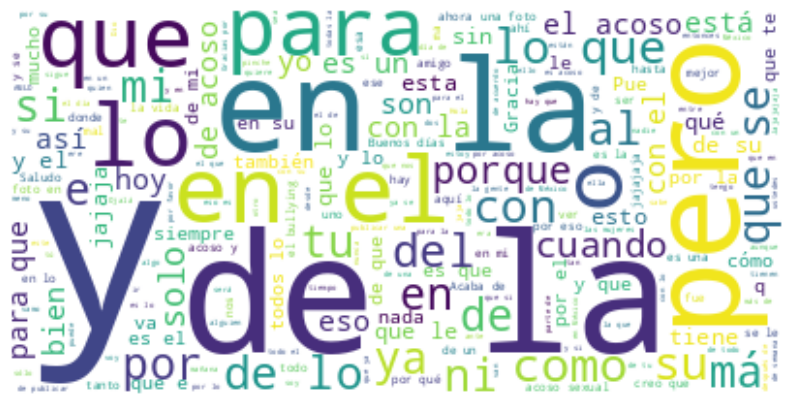

In [8]:
# Crear la nube de palabras con la columna text_cleaned
long_string = ' '.join(df['text_cleaned'].values)  # Unir todo el texto limpio

# Configurar el objeto WordCloud
wordcloud = WordCloud(
    background_color="white",
    max_words=70000,
    contour_width=3,
    contour_color='steelblue'
)

# Generar la nube de palabras
wordcloud.generate(long_string)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [9]:
import nltk
nltk.download('punkt') #Tokenizer
nltk.download('wordnet') #Lemmatizer
nltk.download('stopwords') #Stopwords
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [10]:
import spacy

In [11]:
!pip install --upgrade --force-reinstall gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Att

In [12]:
!pip install --upgrade numpy
!pip install --upgrade --force-reinstall gensim

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (

# Eliminación de stopwords

In [13]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import spacy
from gensim.models import Word2Vec
import gensim.downloader
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [14]:
stop_words = set(stopwords.words("english"))
stopwords_es = set(stopwords.words('spanish'))

## Tokenización

In [15]:
#Tokenización
def tokenize_text(text):
    return word_tokenize(text, language='spanish')

df['tokens'] = df['text_cleaned'].apply(tokenize_text)

In [16]:
# Mostrar resultados
print(df[['text_cleaned', 'tokens']].head())

                                        text_cleaned  \
0  Qué bueno que no pusiste un hashtag porque no ...   
1  Acabo de mamarme un latte frío como si de eso ...   
2  Tendrás ahí a lamano el cortometraje gol de mo...   
3                               Un vídeo genialisimo   
4  El Jefe del Departamento de Secundarias Genera...   

                                              tokens  
0  [Qué, bueno, que, no, pusiste, un, hashtag, po...  
1  [Acabo, de, mamarme, un, latte, frío, como, si...  
2  [Tendrás, ahí, a, lamano, el, cortometraje, go...  
3                           [Un, vídeo, genialisimo]  
4  [El, Jefe, del, Departamento, de, Secundarias,...  


In [17]:
# Explotar los tokens para tener uno por fila
tokens_df = df.explode('tokens')[['tokens']].dropna()

output_tokens = "/content/drive/My Drive/DATASET_TESIS_CIC/PRUEBAS_TLN/CB_tokens_list.csv"
tokens_df.to_csv(output_tokens, index=False, encoding='utf-8')

print(f"Lista de tokens guardada en: {output_tokens}")

Lista de tokens guardada en: /content/drive/My Drive/DATASET_TESIS_CIC/PRUEBAS_TLN/CB_tokens_list.csv


In [18]:
# Guardar dataframe con tokens
output_csv = "/content/drive/My Drive/DATASET_TESIS_CIC/PRUEBAS_TLN/CB_data_tokens.csv"
df.to_csv(output_csv, index=False, encoding='utf-8')

print(f"Archivo con tokens guardado en: {output_csv}")

Archivo con tokens guardado en: /content/drive/My Drive/DATASET_TESIS_CIC/PRUEBAS_TLN/CB_data_tokens.csv


## Filtrado de palabras

In [19]:
# Función de filtrado de stopwords
def remove_stopwords(text, language='spanish'):
    stopwords_set = set(stopwords.words(language))
    tokens = word_tokenize(text.lower(), language=language)

    # Filtrado de stopwords y palabras con menos de 3 caracteres
    filtered_words = [word for word in tokens if word not in stopwords_set and len(word) > 2]
    return " ".join(filtered_words)  # Devuelve el texto unido

In [20]:
# Aplicar limpieza
df["text_cleaned"] = df["text"].apply(clean_excel_text)

# Aplicar filtrado de stopwords a la columna limpia
df["text_filtered"] = df["text_cleaned"].apply(remove_stopwords)

# Mostrar resultados
print(df[["text", "text_cleaned", "text_filtered"]].head())


                                                text  \
0  @feralama Qué bueno que no pusiste un hashtag ...   
1  Acabo de mamarme un latte frío como si de eso ...   
2  @clubhilosfutbol @OficialCAP @LosAromosCAP @ra...   
3  @laloespana @marisolpereda @DMargaraFran Un ví...   
4  El Jefe del Departamento de Secundarias Genera...   

                                        text_cleaned  \
0  Qué bueno que no pusiste un hashtag porque no ...   
1  Acabo de mamarme un latte frío como si de eso ...   
2  Tendrás ahí a lamano el cortometraje gol de mo...   
3                               Un vídeo genialisimo   
4  El Jefe del Departamento de Secundarias Genera...   

                                       text_filtered  
0             bueno pusiste hashtag soportaría acoso  
1           acabo mamarme latte frío dependiera vida  
2                 ahí lamano cortometraje gol morena  
3                                  vídeo genialisimo  
4  jefe departamento secundarias generales sinalo..

In [21]:
output_path = "/content/drive/My Drive/DATASET_TESIS_CIC/PRUEBAS_TLN/CB_data_filtered.csv"
df.to_csv(output_path, index=False, encoding='utf-8')
print(f"Dataset guardado en: {output_path}")

Dataset guardado en: /content/drive/My Drive/DATASET_TESIS_CIC/PRUEBAS_TLN/CB_data_filtered.csv


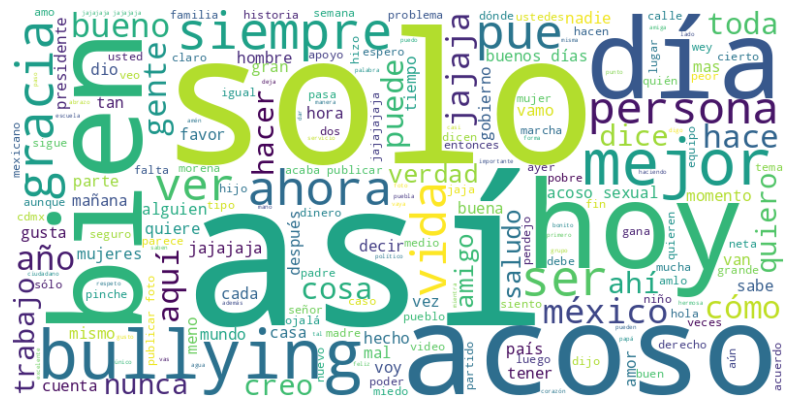

Nube de palabras guardada en: /content/drive/My Drive/DATASET_TESIS_CIC/PRUEBAS_TLN/wordcloud.png


In [22]:
# Obtener el texto filtrado y unirlo en una sola cadena
words_filter = ' '.join(df["text_filtered"].dropna())  # Usar la columna sin stopwords

# Configurar la nube de palabras
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    stopwords=set(stopwords.words('spanish')))

# Generar la nube
wordcloud.generate(words_filter)

# Mostrar la nube
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar ejes
plt.show()

output_image = "/content/drive/My Drive/DATASET_TESIS_CIC/PRUEBAS_TLN/wordcloud.png"
wordcloud.to_file(output_image)
print(f"Nube de palabras guardada en: {output_image}")


In [23]:
# Añadir palabras stopwords que aún aparecen
extra_stopwords = {"así", "vez", "cómo", "sólo", "solo", "amlo", "hacer", "hace", "pue"}
stopwords_es.update(extra_stopwords)

In [24]:
def remove_stopwords(text, stopwords_list):
    tokens = word_tokenize(text.lower(), language='spanish')
    filtered_words = [word for word in tokens if word not in stopwords_list and len(word) > 2]
    return " ".join(filtered_words)

# Aplicar filtro actualizado
df["text_filtered"] = df["text_cleaned"].apply(remove_stopwords, stopwords_list=stopwords_es)

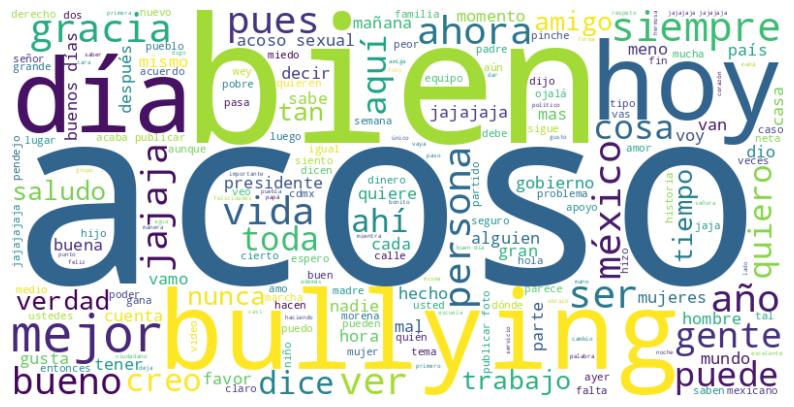

In [25]:
# Creación de nueva nube de palabras con el texto filtrado y ajustado a palabras

texto_filtrado = ' '.join(df["text_filtered"].dropna())
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords_es
).generate(texto_filtrado)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()